In [1]:
import sympy as sym

sym.init_printing()

## Exercise 1: Linear equation

**a)** Define the following matrix in Sympy:

$$A = \begin{pmatrix}
2 & -1 & \alpha \\
-1 & 2 & -1 \\
\alpha & -1 & 2 
\end{pmatrix}$$

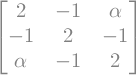

In [2]:
alpha = sym.Symbol('alpha')

A = sym.Matrix(3,3, [2,-1,alpha,-1,2,-1,alpha,-1,2])

A

**b)** Compute the determinant of $A$ and factorize it as a polynomial of $\alpha$. 

In [3]:
# Compute the determinant of A
d = A.det()

d

In [4]:
# Factorize the determinant

d.factor()


**c)** Notice that $A$ is positive definite according to  Sylvester's criterion iff its determinant is positive, since the first two leading principal minors are positive. Use Sympy's ```solveset``` function to find when the determinant of $A$ is positive.

In [5]:
sym.solveset(d>0, alpha, domain=sym.Reals)

**d)** Set $\alpha=1$ and solve a linear equation $Ax=b$ for $x$, where $b=[2,4,6]$.

In [6]:
b = sym.Matrix(3,1, [2,4,6])

A.subs({alpha: 1}).solve(b)

## Exercise 2: Gambler's Ruin

Consider the following two-player game: Alice and Bob toss a fair coin. In case of heads, Alice gets one euro from Bob, otherwise Bob gets one euro from Alice. Alice starts with 2 euros. The game ends if Alice has 4 euros or if she has lost all the money. 

This game can be illustrated by the following state graph, where the states' numbers indicate how much money Alice currently has, and the weights of arrows indicate the transition probabilities.

![](https://raw.githubusercontent.com/mselezniova/CompMath23/media/images/week14/game.png)

**a)** Create the transition matrix of the game $M$, where $M_{i,j}$ is the probability to transition from state $i$ to state $j$.

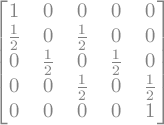

In [7]:
N = 5 # the number of states

half = sym.Rational(1,2)

# We can generate a matrix using a function
def M_ij(i,j):
    if (( j == 0 and i== 0) or (j == N-1 and i== N-1)): 
        return 1 
    elif (i > 0 and i < N-1 and j == i-1):
        return half 
    elif (i > 0 and i < N-1 and j == i+1):
        return half
    else:
        return 0

M = sym.Matrix(N,N, M_ij)

M

**b)** The matrix power $M^t$ gives the transition probabilities after $t$ rounds. Determine $M^\infty = \lim_{t\to\infty} M^t$.

*Hint: You can diagonalize $M$ and find the limit of powers of the the diagonal matrix components.*

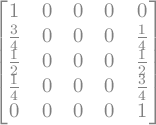

In [8]:
n = sym.Symbol('n')

# diagonalize the matrix M
V,D = M.diagonalize()

# find limits of the diagonal elements and form the limit of the diagonal matrix
D_lim = sym.diag(*[sym.limit_seq(D[i,i]**n,n) for i in range(N)])

# use the limit of D to find the limit of M
M_lim = V*D_lim*V**-1  

M_lim

**c)** Determine the probability that Alice will go bankrupt. To do so, create a vector $v=[0,0,1,0]$ and calculate $vM^\infty$.

In [11]:
m = 2 # the index of the initial state (state 2 has index 2 in our case)

# We can generate the vector using a function
def v_ij(i,j):
    if j==m:
        return 1
    else:
        return 0
    
v = sym.Matrix(1,N, v_ij)

(v*M_lim)[0]

**d)** What happens with the probability of bankruptcy if the game ends not when Alice has 4 euros but when she has 5 or 6 euros?

In [19]:
# Running the code above for N=5,6,7,etc. shows that the probability of bankruptcy increases with N